<h1 align='center' style='background-color:yellow;'>Classification Assignment 2 - Naive Bayes</h1>

In [1]:
# Importing all necessary libraries and sklearn naive bayes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score,auc,roc_auc_score,roc_curve,recall_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from tabulate import tabulate
import lime
import lime.lime_tabular

In [2]:
# Read the dataset which is in cdv format and store it into variable
df_nb=pd.read_csv('liver_disease_1.csv')
df_nb.replace({'Dataset':{'Yes':1 ,'No':0}}, inplace=True)

In [3]:
# displaying top 5 records to check how the data format is
df_nb.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# displaying descriptional statistics to get data insights
df_nb.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [5]:
# checking if there is any nullable columns
df_nb.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
# checking the count of nullable columns
df_nb.isnull().sum().sum()

4

In [7]:
# check if there is any duplicate rows. Since there is no id column, include all cols
df_nb[df_nb.duplicated(df_nb.columns[:-1])]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,2.6,1.2,410,59,57,5.6,3.0,0.80,0
55,42,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,5.3,2.3,145,32,92,5.1,2.6,1.00,0
108,36,0.8,0.2,158,29,39,6.0,2.2,0.50,0
138,18,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [8]:
# drop duplicated rows by keeping first row and deleting other dupicated rows
df_nb.drop_duplicates(subset =df_nb.columns[:-1], keep = 'first', inplace = True) 

In [9]:
df_nb.shape

(570, 10)

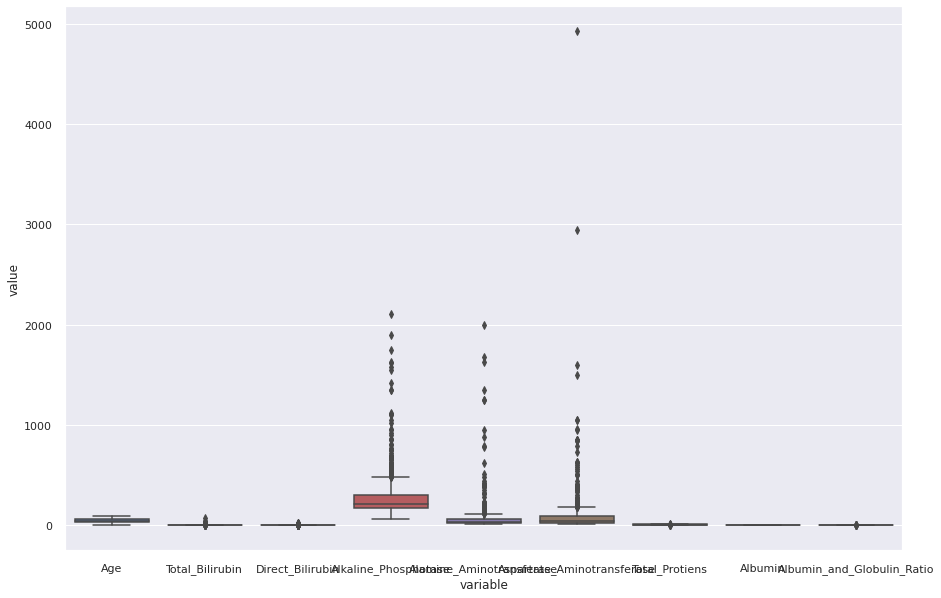

In [10]:
# plotting box plots to check if there is any outliers
plt.figure(figsize=(15,10))
melted_df = pd.melt(df_nb.drop('Dataset', axis=1))
sns.boxplot(x="variable", y="value", data=melted_df)

In [11]:
tmp = 700
display(df_nb[(df_nb['Alkaline_Phosphotase']>tmp)&(df_nb['Alamine_Aminotransferase']>tmp)&(df_nb['Aspartate_Aminotransferase']>tmp)])
tmpindex = df_nb[(df_nb['Alkaline_Phosphotase']>tmp)&(df_nb['Alamine_Aminotransferase']>tmp)&(df_nb['Aspartate_Aminotransferase']>tmp)].index
tmp= 2000
tmpindex = df_nb[(df_nb['Aspartate_Aminotransferase']>tmp)].index
tmpindex

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
135,66,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,1
199,7,27.2,11.8,1420,790,1050,6.1,2.0,0.4,1


Int64Index([117, 135], dtype='int64')

In [12]:
# dropping outlier rows
df_nb.drop(tmpindex, inplace=True)

In [13]:
df_nb.shape

(568, 10)

In [14]:
# Splitting the dataset into inputs and output columns
X, y = df_nb.iloc[:, :-1], df_nb.iloc[:, -1]

In [15]:
# Instead of fillling Nan with mean/median, using IterativeImputer which is based on all columns 
# to generate inputed value
imp = IterativeImputer(max_iter=15, verbose=0)
#imp = KNNImputer(n_neighbors=3, weights="uniform")
imp.fit(X)
X = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

In [16]:
#X.loc[X.index.isin([209,241,253,312]), ['Albumin_and_Globulin_Ratio']] = 0.93

In [17]:
X[X.index.isin(df_nb[df_nb['Albumin_and_Globulin_Ratio'].isna()].index)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,70.0,1.7,0.5,400.0,56.0,44.0,5.7,3.1,1.1
241,50.0,0.9,0.3,901.0,23.0,17.0,6.2,3.5,1.2
253,40.0,14.5,6.4,358.0,50.0,75.0,5.7,2.1,0.5
312,24.0,3.3,1.6,174.0,11.0,33.0,7.6,3.9,1.0


In [18]:
# Scaling the features by using min max scaling
minmax_scale = preprocessing.MinMaxScaler().fit(X.iloc[:,:])
X.iloc[:,:] = minmax_scale.transform(X.iloc[:,:])

In [19]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,0.004021,0.000000,0.060576,0.003593,0.005031,0.594203,0.521739,0.240
1,0.674419,0.140751,0.275510,0.310699,0.032335,0.056604,0.695652,0.500000,0.176
2,0.674419,0.092493,0.204082,0.208598,0.029940,0.036478,0.623188,0.521739,0.236
3,0.627907,0.008043,0.015306,0.058134,0.002395,0.006289,0.594203,0.543478,0.280
4,0.790698,0.046917,0.096939,0.064485,0.010180,0.030818,0.666667,0.326087,0.040


In [20]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

In [21]:
# Initializing Gaussian Naive Bayes Algorithm ad fitting the train dataset
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred_prob = gnb.predict_proba(X_test)[:,1]

In [22]:
# calculating confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[47,  2],
       [70, 52]])

Text(0.5, 0, 'False Positive Rate')

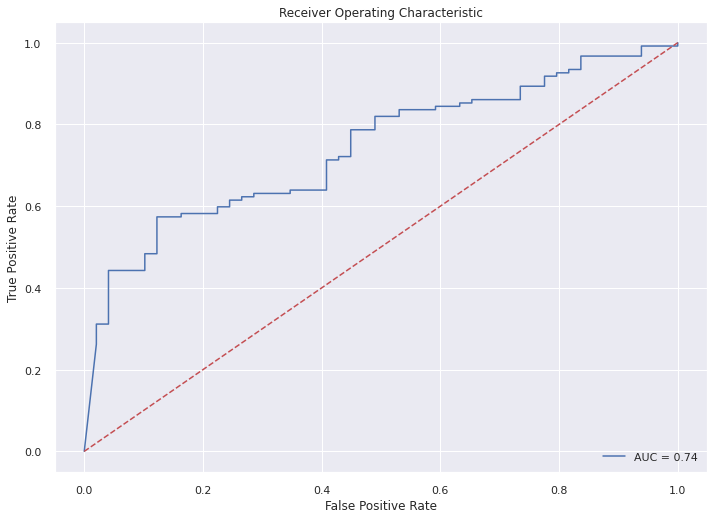

In [23]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)
#print('Threshold : ' + str(thresholds))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [24]:
# Calculating various metrics and displaying
gauss_score = gnb.score(X_train, y_train)
gauss_score_test = gnb.score(X_test, y_test)
gauss_accuracy = accuracy_score(y_test, y_pred)
gauss_cm = confusion_matrix(y_test,y_pred)
gauss_report = classification_report(y_test,y_pred)
print('Gaussian Train Score: ', gauss_score)
print('Gaussian Test Score: ', gauss_score_test)
print('Accuracy: ', gauss_accuracy)
print(gauss_cm)
print(gauss_report)

Gaussian Train Score:  0.5869017632241813
Gaussian Test Score:  0.5789473684210527
Accuracy:  0.5789473684210527
[[47  2]
 [70 52]]
              precision    recall  f1-score   support

           0       0.40      0.96      0.57        49
           1       0.96      0.43      0.59       122

    accuracy                           0.58       171
   macro avg       0.68      0.69      0.58       171
weighted avg       0.80      0.58      0.58       171



<h1 align='center' style='background-color:yellow;'>Classification Assignment 2 - Logistic Regression</h1>

In [25]:
# Importing all necessary libraries and sklearn naive bayes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score,auc,roc_auc_score,roc_curve,recall_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from tabulate import tabulate
import lime
import lime.lime_tabular

In [26]:
# Read the dataset which is in cdv format and store it into variable
df_logit=pd.read_csv('liver_disease_1.csv')
df_logit.replace({'Dataset':{'Yes':1 ,'No':0}}, inplace=True)

In [27]:
# drop duplicated rows by keeping first row and deleting other dupicated rows
df_logit.drop_duplicates(subset =df_logit.columns[:-1], keep = 'first', inplace = True) 

In [28]:
tmp = 700
display(df_logit[(df_logit['Alkaline_Phosphotase']>tmp)&(df_logit['Alamine_Aminotransferase']>tmp)&(df_logit['Aspartate_Aminotransferase']>tmp)])
tmpindex = df_logit[(df_logit['Alkaline_Phosphotase']>tmp)&(df_logit['Alamine_Aminotransferase']>tmp)&(df_logit['Aspartate_Aminotransferase']>tmp)].index
tmp= 2000
tmpindex = df_logit[(df_logit['Aspartate_Aminotransferase']>tmp)].index
tmpindex

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
135,66,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,1
199,7,27.2,11.8,1420,790,1050,6.1,2.0,0.4,1


Int64Index([117, 135], dtype='int64')

In [29]:
# dropping outlier rows
df_logit.drop(tmpindex, inplace=True)

In [30]:
# Splitting the dataset into inputs and output columns
X, y = df_logit.iloc[:, :-1], df_logit.iloc[:, -1]

In [31]:
# Instead of fillling Nan with mean/median, using IterativeImputer which is based on all columns 
# to generate inputed value
imp = IterativeImputer(max_iter=15, verbose=0)
#imp = KNNImputer(n_neighbors=3, weights="uniform")
imp.fit(X)
X = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

In [32]:
# Scaling the features by using min max scaling
minmax_scale = preprocessing.MinMaxScaler().fit(X.iloc[:,:])
X.iloc[:,:] = minmax_scale.transform(X.iloc[:,:])

In [33]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

In [34]:
# Initializing Gaussian Naive Bayes Algorithm ad fitting the train dataset
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [35]:
# calculating confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0,  49],
       [  1, 121]])

Text(0.5, 0, 'False Positive Rate')

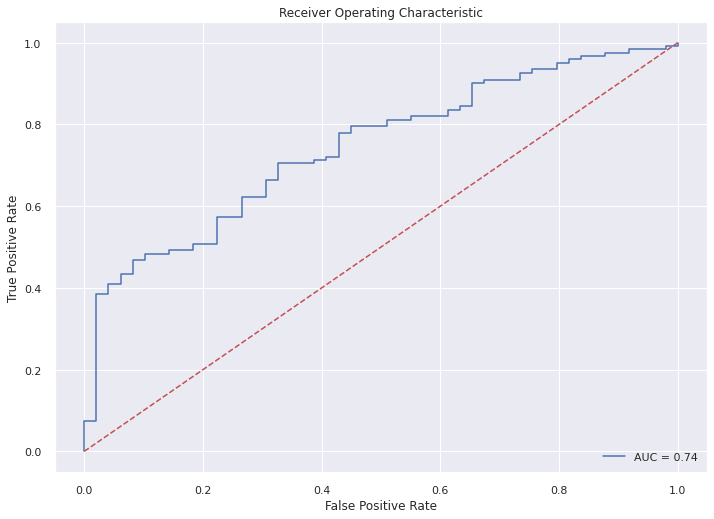

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [37]:
# Calculating various metrics and displaying
logreg_score = logreg.score(X_train, y_train)
logreg_score_test = logreg.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_cm = confusion_matrix(y_test,y_pred)
logreg_report = classification_report(y_test,y_pred)
print('Gaussian Train Score: ', logreg_score)
print('Gaussian Test Score: ', logreg_score_test)
print('Accuracy: ', logreg_accuracy)
print(logreg_cm)
print(logreg_report)

Gaussian Train Score:  0.7153652392947103
Gaussian Test Score:  0.7076023391812866
Accuracy:  0.7076023391812866
[[  0  49]
 [  1 121]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      0.99      0.83       122

    accuracy                           0.71       171
   macro avg       0.36      0.50      0.41       171
weighted avg       0.51      0.71      0.59       171



<h1 align='center' style='background-color:yellow;'>Conclusion</h1>

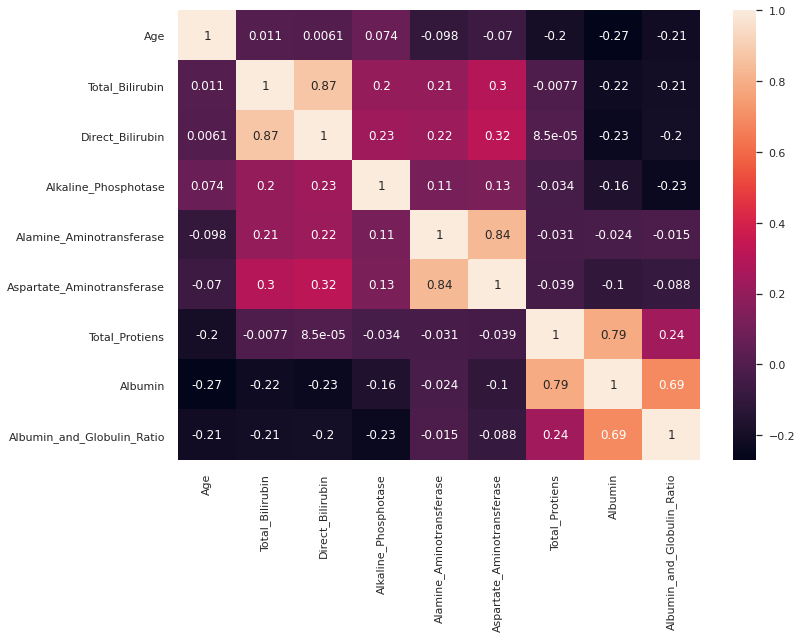

In [38]:
# displaying the relationship between columns
sns.heatmap(X.corr(), annot=True)

<h3 align='center' style='background-color:yellow;'>Comparing Metrics</h3> 

In [39]:
table =[['Train Score', gauss_score, logreg_score],['Test Score', gauss_score_test, logreg_score_test],
       ['Accuracy', gauss_accuracy, logreg_accuracy],['Confusion Matrix',gauss_cm, logreg_cm],
       ['AUC', 0.74, 0.74]]
print(tabulate(table, headers=["Metrics", "Naive Bayes", "Logistic Regression"],tablefmt="fancy_grid"))

╒══════════════════╤════════════════════╤═══════════════════════╕
│ Metrics          │ Naive Bayes        │ Logistic Regression   │
╞══════════════════╪════════════════════╪═══════════════════════╡
│ Train Score      │ 0.5869017632241813 │ 0.7153652392947103    │
├──────────────────┼────────────────────┼───────────────────────┤
│ Test Score       │ 0.5789473684210527 │ 0.7076023391812866    │
├──────────────────┼────────────────────┼───────────────────────┤
│ Accuracy         │ 0.5789473684210527 │ 0.7076023391812866    │
├──────────────────┼────────────────────┼───────────────────────┤
│ Confusion Matrix │ [[47  2]           │ [[  0  49]            │
│                  │  [70 52]]          │  [  1 121]]           │
├──────────────────┼────────────────────┼───────────────────────┤
│ AUC              │ 0.74               │ 0.74                  │
╘══════════════════╧════════════════════╧═══════════════════════╛


In [40]:
table =[['Classification Report - Row1 (Naive Bayes), Row2 (Logistic Regression)'],[gauss_report],[logreg_report]]
print(tabulate(table,tablefmt="fancy_grid"))

╒════════════════════════════════════════════════════════════════════════╕
│ Classification Report - Row1 (Naive Bayes), Row2 (Logistic Regression) │
├────────────────────────────────────────────────────────────────────────┤
│ precision    recall  f1-score   support                                │
│                                                                        │
│            0       0.40      0.96      0.57        49                  │
│            1       0.96      0.43      0.59       122                  │
│                                                                        │
│     accuracy                           0.58       171                  │
│    macro avg       0.68      0.69      0.58       171                  │
│ weighted avg       0.80      0.58      0.58       171                  │
├────────────────────────────────────────────────────────────────────────┤
│ precision    recall  f1-score   support                                │
│                        

<h3 align='center' style='background-color:yellow;'>Inferences</h3> 

In [41]:
# Model Interpretability tells how the model decides the output class (0 or 1)
def interpretModel(index, model):
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                      class_names=[1,0], mode='classification',discretize_continuous=True)
    exp = explainer.explain_instance(X_test.iloc[index], model.predict_proba)
    exp.show_in_notebook(show_table=True, show_all=True)
    display(exp.as_list())
    exp.as_pyplot_figure()

<h3 align='center' style='background-color:yellow;'>Model Interpretability</h3> 

╒══════════════════════════════════════════════╕
│ Logistic Regression - Model Interpretability │
╘══════════════════════════════════════════════╛


[('Direct_Bilirubin > 0.06', 0.11042461456986166),
 ('Alkaline_Phosphotase > 0.11', 0.06483754029399062),
 ('Aspartate_Aminotransferase > 0.04', 0.0595273256087477),
 ('Albumin <= 0.37', 0.05228525855425663),
 ('Age <= 0.34', -0.039421762432661545),
 ('Alamine_Aminotransferase > 0.03', 0.03841106714524016),
 ('Total_Bilirubin > 0.03', 0.034380916598145066),
 ('Albumin_and_Globulin_Ratio <= 0.16', 0.03118149170452488),
 ('0.42 < Total_Protiens <= 0.55', -0.0016709703209612993)]

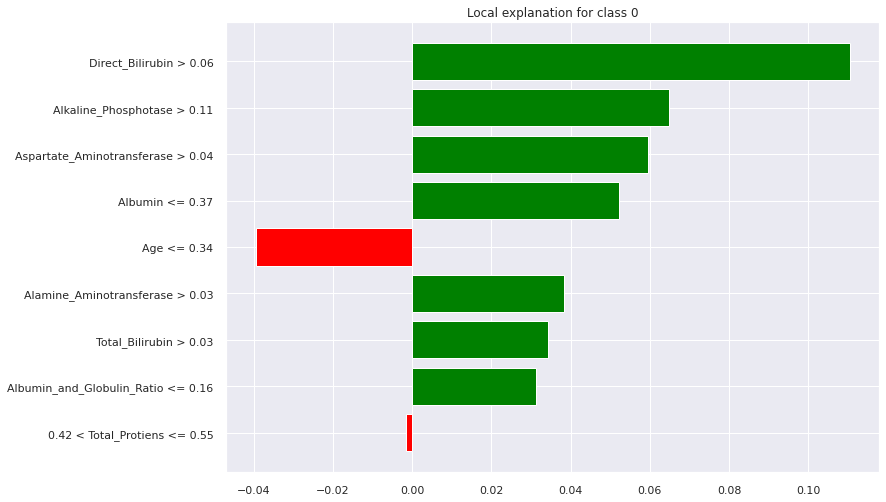

In [42]:
# checking some random rows, (i.e) - 5th row of Train Data
print(tabulate([["Logistic Regression - Model Interpretability"]], tablefmt='fancy_grid'))
interpretModel(5,logreg)

╒══════════════════════════════════════╕
│ Naive Bayes - Model Interpretability │
╘══════════════════════════════════════╛


[('Direct_Bilirubin > 0.06', 0.34936703370559996),
 ('Total_Bilirubin > 0.03', 0.34783972983106914),
 ('Alamine_Aminotransferase > 0.03', 0.3146501295899117),
 ('Aspartate_Aminotransferase > 0.04', 0.3033666562452601),
 ('Alkaline_Phosphotase > 0.11', 0.2136991487345236),
 ('Age <= 0.34', 0.01120029258124681),
 ('Albumin <= 0.37', 0.005953903056469121),
 ('0.42 < Total_Protiens <= 0.55', 0.004950613787347327),
 ('Albumin_and_Globulin_Ratio <= 0.16', -0.0036532622283596584)]

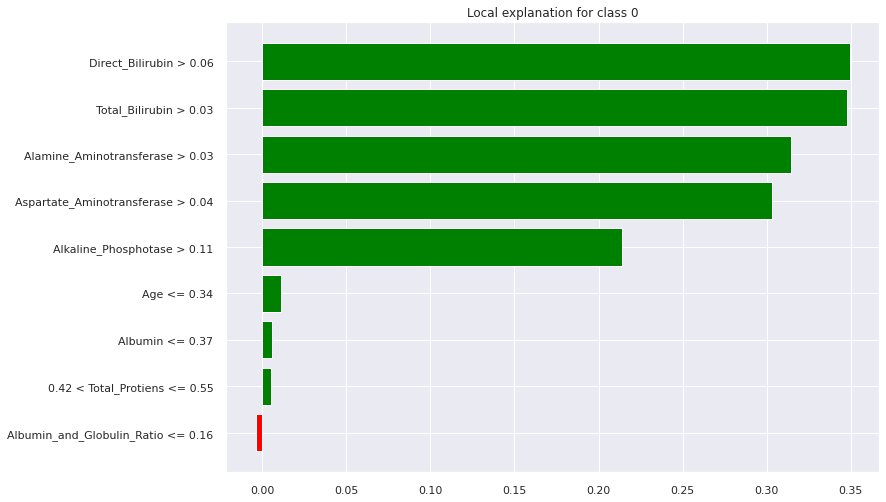

In [43]:
# checking some random rows, (i.e) - 5th row of Train Data
print(tabulate([["Naive Bayes - Model Interpretability"]], tablefmt='fancy_grid'))
interpretModel(5,gnb)

<p style="font-weight:bold;">
Naive Bayes classifier is the generative model and logistic regression is the discriminative model.
Naive Bayes assumes that the features are conditionally independent. Here some of the columns like (Total_Bilirubin and Direct_Bilirubin), (Alamine_Aminotransferase and Aspartate_Aminotransferase) are highly correlated. Hence the Naive Bayes predictions might be poor when compared to Logistic Regression. In case of Naive Byes, Age and Albumin makes the output class 1 whereas in Logistic Regression, Albumin and Albumin_and_Globulin_Ratio makes the output class 1. Finally using Logic Regression Algorithm will be the right approach for this dataset.
</p>

In [44]:
print('END OF NOTEBOOK')

END OF NOTEBOOK
